<a href="https://colab.research.google.com/github/HarikrishnanK9/Spam_Email_Detection/blob/main/NLP_Spam_Email_Detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/NLP_ML_Datasets/Phishing_Email.csv' '/content/'

In [ ]:
df=pd.read_excel("/content/email_spam.xlsx")

In [ ]:
df.head()

,Column1,Subject,isspam
0,0,"Confidential :Soma:, Ci@lis, :P:ntermin",spam
1,1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,spam
2,2,NaN,spam
3,3,StOck 0ppurtunities - their sh0Oting,spam
4,4,CP&L tariff changes (ER01-1807),not spam


In [ ]:
df.rename(columns={'Subject': 'Email Text', 'isspam': 'Email Type'}, inplace=True)

In [ ]:
df.dtypes

Column1        int64
Email Text    object
Email Type    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37889 entries, 0 to 37888
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Column1     37889 non-null  int64 
 1   Email Text  36936 non-null  object
 2   Email Type  37889 non-null  object
dtypes: int64(1), object(2)
memory usage: 888.1+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(["Column1"],inplace=True,axis=1)

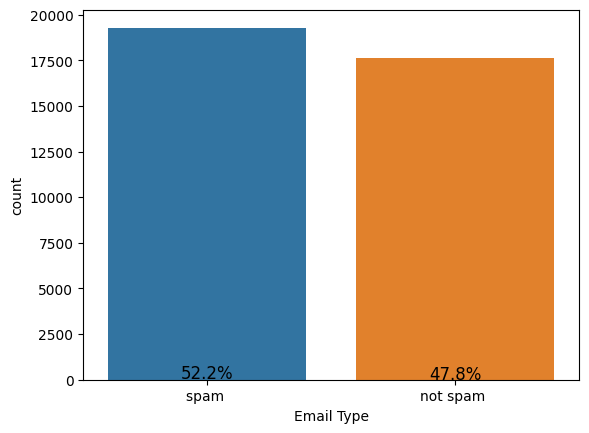

In [ ]:
percentage_counts = df['Email Type'].value_counts(normalize=True) * 100
sns.countplot(data = df,x="Email Type")
total_count = len(df)
for index, value in enumerate(percentage_counts):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12, color='black')
plt.show()

In [ ]:
df['Email Type'].unique()

array(['spam ', 'not spam '], dtype=object)

In [ ]:
df["Email Type"]=df["Email Type"].map({'spam ':1,'not spam ':0})

In [ ]:
#num of characters
df['num_of_characters'] = df['Email Text'].apply(len)
df

,Email Text,Email Type,num_of_characters
0,"Confidential :Soma:, Ci@lis, :P:ntermin",1,39
1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,1,68
3,StOck 0ppurtunities - their sh0Oting,1,36
4,CP&L tariff changes (ER01-1807),0,31
5,IM draft - Florida Projects,0,27
...,...,...,...
37884,"frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...",1,106
37885,Get PAYPERVIEW FOR_NOTHING,1,26
37886,RE: Nice Mmos wants a date,1,26
37887,Get_All Premeium_Movie channels _Free,1,37


In [ ]:
#num of words
df['no_of_words'] = df['Email Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Email Text,Email Type,num_of_characters,no_of_words
0,"Confidential :Soma:, Ci@lis, :P:ntermin",1,39,13
1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,1,68,12
3,StOck 0ppurtunities - their sh0Oting,1,36,5
4,CP&L tariff changes (ER01-1807),0,31,8
5,IM draft - Florida Projects,0,27,5


In [ ]:
#num of sentences
df['no_of_sentence'] = df['Email Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Email Text,Email Type,num_of_characters,no_of_words,no_of_sentence
0,"Confidential :Soma:, Ci@lis, :P:ntermin",1,39,13,1
1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,1,68,12,2
3,StOck 0ppurtunities - their sh0Oting,1,36,5,1
4,CP&L tariff changes (ER01-1807),0,31,8,1
5,IM draft - Florida Projects,0,27,5,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email Type,36936.0,0.522309,0.499509,0.0,0.0,1.0,1.0,1.0
num_of_characters,36936.0,38.606021,34.914884,1.0,21.0,32.0,49.0,517.0
no_of_words,36936.0,7.694038,13.350415,0.0,4.0,6.0,9.0,245.0
no_of_sentence,36936.0,1.080815,0.339366,0.0,1.0,1.0,1.0,7.0


In [ ]:
df[df['Email Type']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Email Type,17644.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
num_of_characters,17644.0,32.775164,20.989593,1.0,18.0,28.0,44.0,239.0
no_of_words,17644.0,6.123158,3.846008,1.0,3.0,5.0,8.0,62.0
no_of_sentence,17644.0,1.021424,0.160396,1.0,1.0,1.0,1.0,4.0


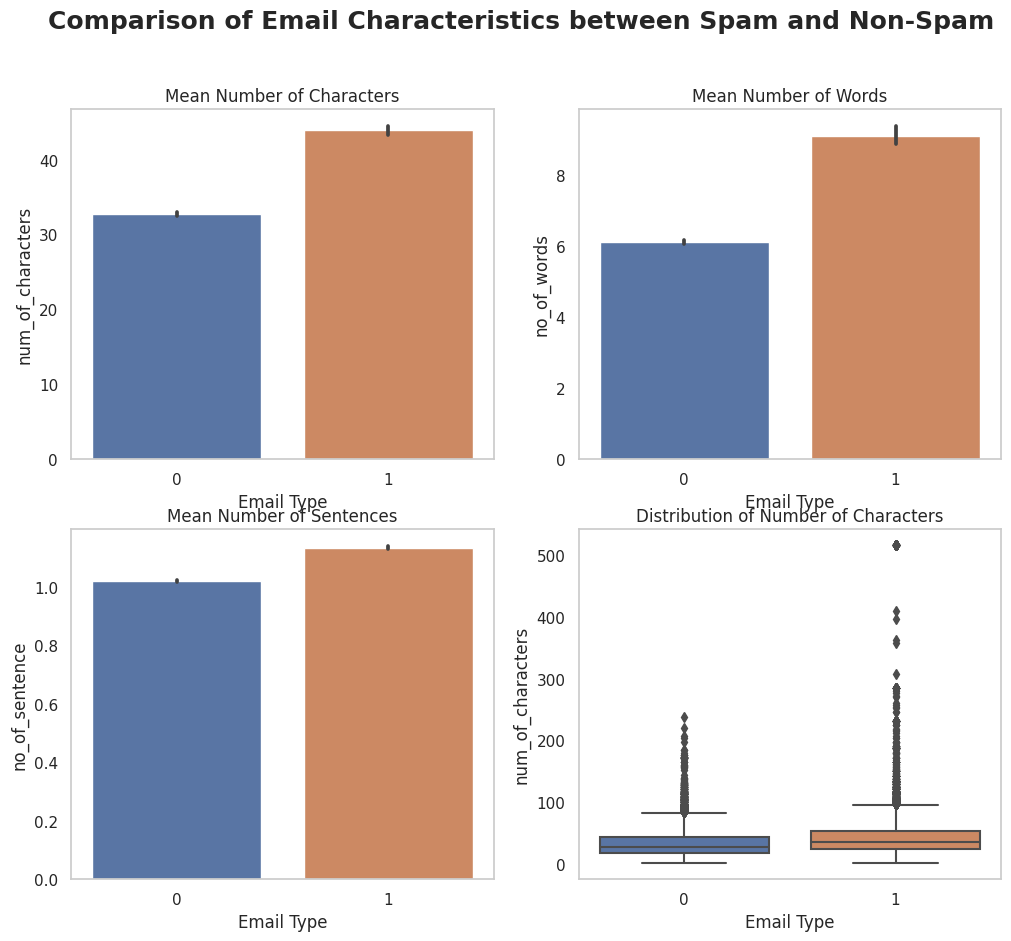

In [ ]:
sns.set_palette("Set2")
sns.set(style='whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.barplot(x='Email Type', y='num_of_characters', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Mean Number of Characters')

sns.barplot(x='Email Type', y='no_of_words', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Mean Number of Words')

sns.barplot(x='Email Type', y='no_of_sentence', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Mean Number of Sentences')

sns.boxplot(x='Email Type',y='num_of_characters',data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Characters')

fig.suptitle('Comparison of Email Characteristics between Spam and Non-Spam', fontsize=18, weight='bold')

for ax in axes.flatten():
    ax.grid(False)

plt.show()


In [ ]:
text=df["Email Text"]
text

0                  Confidential :Soma:, Ci@lis, :P:ntermin
1        ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...
3                     StOck 0ppurtunities - their sh0Oting
4                          CP&L tariff changes (ER01-1807)
5                              IM draft - Florida Projects
                               ...                        
37884    frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...
37885                           Get PAYPERVIEW FOR_NOTHING
37886                           RE: Nice Mmos wants a date
37887                Get_All Premeium_Movie channels _Free
37888    =?utf-8?q?Same medicine -- gno?=_x000D_\n =?ut...
Name: Email Text, Length: 36936, dtype: object

In [ ]:
text=text.str.replace("[^a-zA-z0-9]+"," ")
text

0                       Confidential Soma Ci lis P ntermin
1                                          j cbop blraijvv
3                       StOck 0ppurtunities their sh0Oting
4                           CP L tariff changes ER01 1807 
5                                IM draft Florida Projects
                               ...                        
37884    frustum XANAAX TUSSI0NEEX C1AL1IS \ 11AGRRA \ ...
37885                           Get PAYPERVIEW FOR_NOTHING
37886                            RE Nice Mmos wants a date
37887                Get_All Premeium_Movie channels _Free
37888     utf 8 q Same medicine gno _x000D_ utf 8 q mis...
Name: Email Text, Length: 36936, dtype: object

In [ ]:
sentence = "Get_All Premeium_Movie channels _Free? "
str1 = re.sub('[^a-zA-Z0-9]+'," ",sentence)
str1

'Get All Premeium Movie channels Free '

In [ ]:
from nltk.tokenize import word_tokenize
text = text.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))
text

0                            Confidential Soma lis ntermin
1                                            cbop blraijvv
3                       StOck 0ppurtunities their sh0Oting
4                                 tariff changes ER01 1807
5                                   draft Florida Projects
                               ...                        
37884    frustum XANAAX TUSSI0NEEX C1AL1IS 11AGRRA AL11...
37885                           Get PAYPERVIEW FOR_NOTHING
37886                                 Nice Mmos wants date
37887                Get_All Premeium_Movie channels _Free
37888          utf Same medicine gno _x000D_ utf mish cost
Name: Email Text, Length: 36936, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
text

0                            Confidential Soma lis ntermin
1                                            cbop blraijvv
3                       StOck 0ppurtunities their sh0Oting
4                                 tariff changes ER01 1807
5                                   draft Florida Projects
                               ...                        
37884    frustum XANAAX TUSSI 0NEEX C1AL1IS 11AGRRA AL1...
37885                           Get PAYPERVIEW FOR_NOTHING
37886                                 Nice Mmos wants date
37887                Get_All Premeium_Movie channels _Free
37888          utf Same medicine gno _x000D_ utf mish cost
Name: Email Text, Length: 36936, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x : [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
text

0                              confidenti soma lis ntermin
1                                            cbop blraijvv
3                              stock 0ppurtun their sh0ote
4                                   tariff chang er01 1807
5                                    draft florida project
                               ...                        
37884    frustum xanaax tussi 0neex c1al1i 11agrra al11...
37885                              get payperview for_noth
37886                                  nice mmos want date
37887                   get_al premeium_movi channel _free
37888           utf same medicin gno _x000d_ utf mish cost
Name: Email Text, Length: 36936, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download
stop=stopwords.words("english")
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
text

0                              confidenti soma lis ntermin
1                                            cbop blraijvv
3                                    stock 0ppurtun sh0ote
4                                   tariff chang er01 1807
5                                    draft florida project
                               ...                        
37884    frustum xanaax tussi 0neex c1al1i 11agrra al11...
37885                              get payperview for_noth
37886                                  nice mmos want date
37887                   get_al premeium_movi channel _free
37888                utf medicin gno _x000d_ utf mish cost
Name: Email Text, Length: 36936, dtype: object

In [ ]:
df['Transformed_Text']=text

In [ ]:
df.head()

,Email Text,Email Type,num_of_characters,no_of_words,no_of_sentence,Transformed_Text
0,"Confidential :Soma:, Ci@lis, :P:ntermin",1,39,13,1,confidenti soma lis ntermin
1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,1,68,12,2,cbop blraijvv
3,StOck 0ppurtunities - their sh0Oting,1,36,5,1,stock 0ppurtun sh0ote
4,CP&L tariff changes (ER01-1807),0,31,8,1,tariff chang er01 1807
5,IM draft - Florida Projects,0,27,5,1,draft florida project


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=550,height=550,min_font_size=12,background_color='black')

In [ ]:
spam_wc = wc.generate(df[df['Email Type']==1]['Transformed_Text'].str.cat(sep=' '))

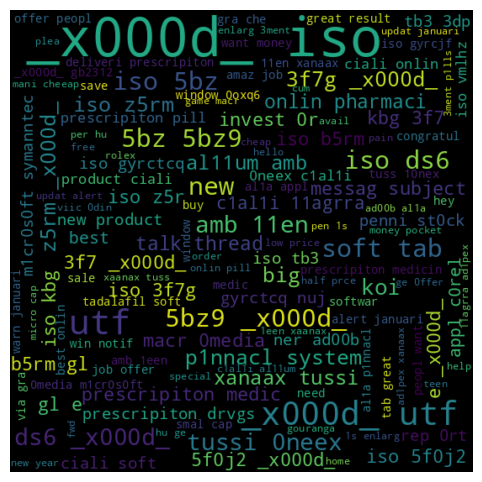

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc,interpolation='bilinear')
plt.axis('off')
plt.show()


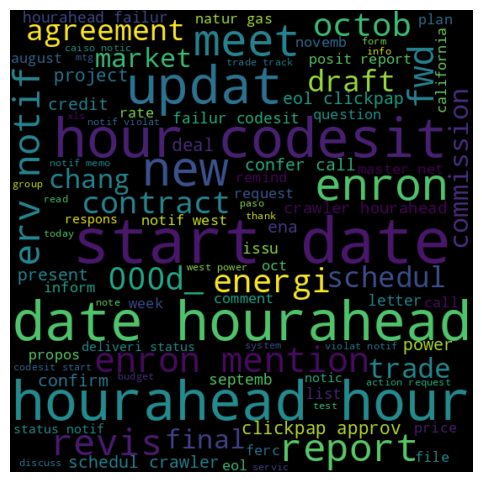

In [ ]:
not_spam_wc = wc.generate(df[df['Email Type']==0]['Transformed_Text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(not_spam_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['Email Type']==1]['Transformed_Text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [ ]:
len(spam_corpus)

72298

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('iso', 2339),
 ('2022', 1815),
 ('_x000d_', 1561),
 ('utf', 836),
 ('onlin', 589),
 ('gb2312', 588),
 ('8859', 483),
 ('new', 477),
 ('get', 404),
 ('need', 392),
 ('prescripiton', 364),
 ('med', 327),
 ('st0ck', 323),
 ('stock', 314),
 ('medic', 282),
 ('window', 282),
 ('best', 268),
 ('1251', 249),
 ('100', 244),
 ('tab', 240),
 ('talk', 232),
 ('pill', 229),
 ('ciali', 227),
 ('januari', 224),
 ('softwar', 222),
 ('watch', 217),
 ('want', 212),
 ('pain', 212),
 ('great', 203),
 ('pharmaci', 200)]

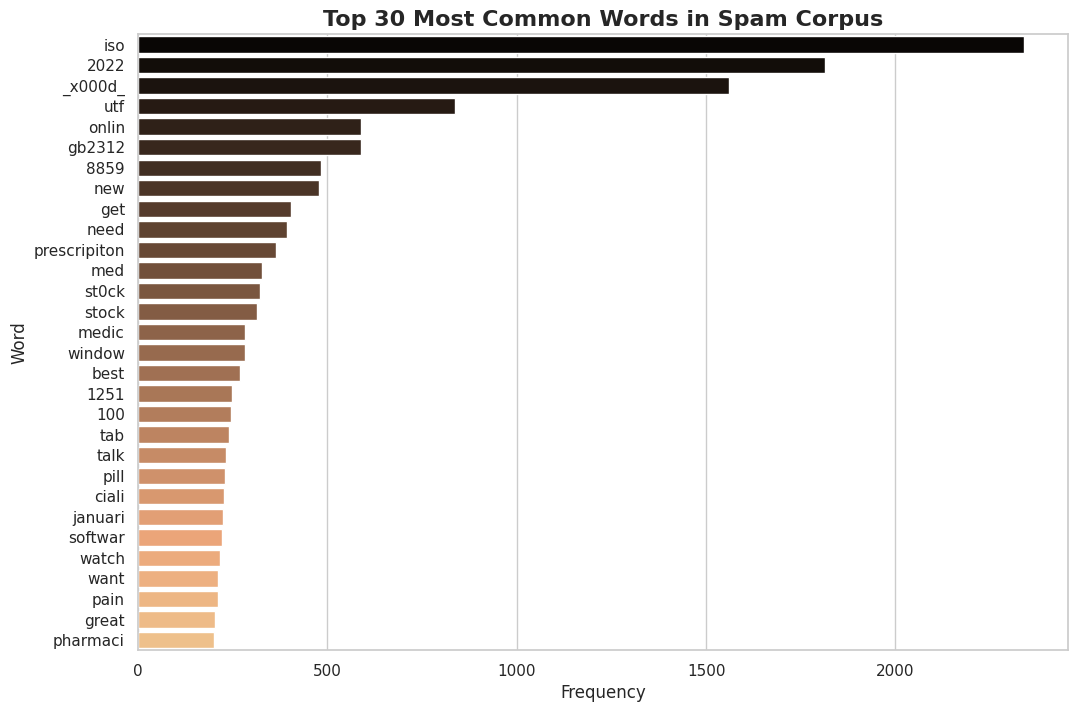

In [ ]:
word_frequencies = Counter(spam_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies,columns=['Word','Frequency'])

plt.figure(figsize=(12,8))
sns.barplot(x='Frequency',y='Word',data=word_freq_df,palette='copper')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Corpus',weight='bold',fontsize=16)
plt.show()

In [ ]:
non_spam_corpus = []
for msg in df[df['Email Type']==0]['Transformed_Text'].tolist():
  for words in msg.split():
    non_spam_corpus.append(words)

In [ ]:
len(non_spam_corpus)

65763

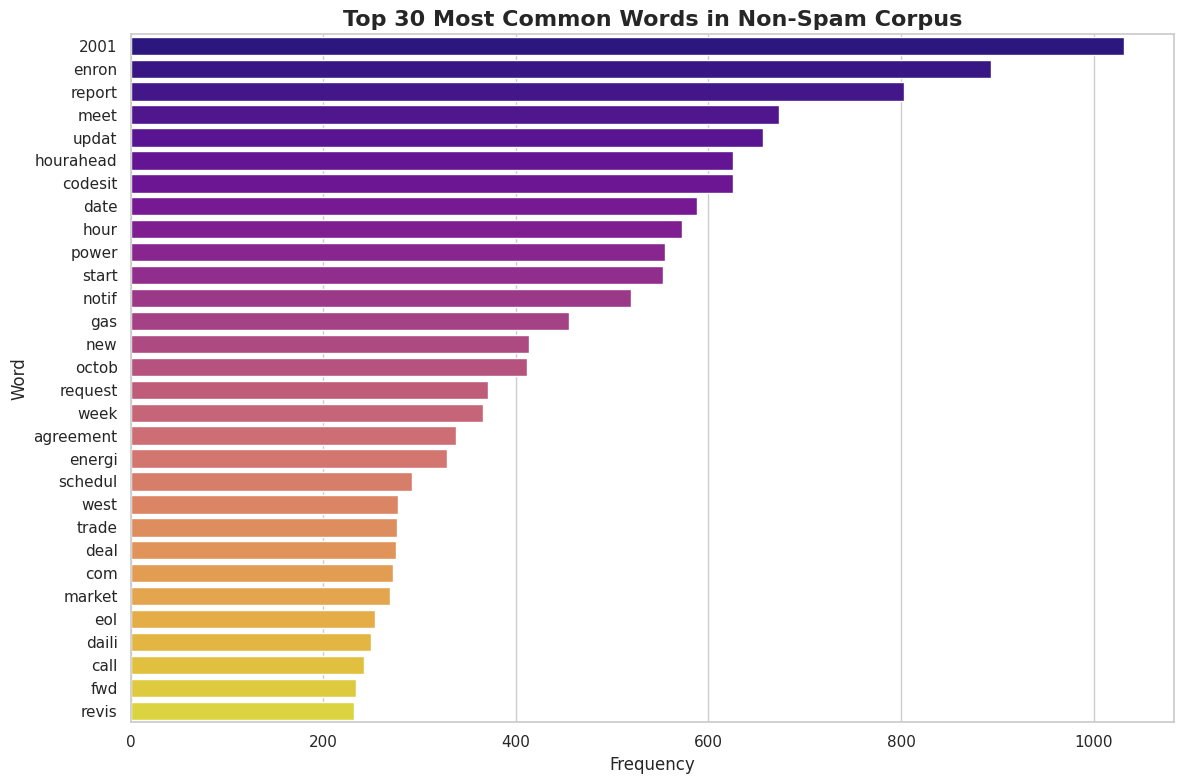

In [ ]:
word_frequencies_non_spam = Counter(non_spam_corpus).most_common(30)
word_freq_df_non_spam  = pd.DataFrame(word_frequencies_non_spam,columns=['Word','Frequency'])
plt.figure(figsize=(12,8))
sns.barplot(x='Frequency',y='Word',data=word_freq_df_non_spam,palette='plasma')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Non-Spam Corpus',weight='bold',fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
data=vec.fit_transform(text)
data

<36936x15452 sparse matrix of type '<class 'numpy.float64'>'
	with 132578 stored elements in Compressed Sparse Row format>

In [ ]:
data.shape

(36936, 15452)

In [ ]:
y=df["Email Type"].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X=data

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler with with_mean=False for sparse matrices
scaler = StandardScaler(with_mean=False)

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((25855, 15452), (11081, 15452))

In [ ]:
y_train.shape,y_test.shape

((25855,), (11081,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
train_accuracy = accuracy_score( y_train, train_pred)
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [ ]:
train_accuracy

0.9825952426996712

In [ ]:
test_accuracy

0.9206750293294829

* train_accuracy>test_accuracy
* Indication of overfitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 30,random_state=42)
rfc.fit(X_train, y_train)
y_pred1=rfc.predict(X_test)
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

0.9285263062900461
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5301
           1       0.90      0.97      0.93      5780

    accuracy                           0.93     11081
   macro avg       0.93      0.93      0.93     11081
weighted avg       0.93      0.93      0.93     11081



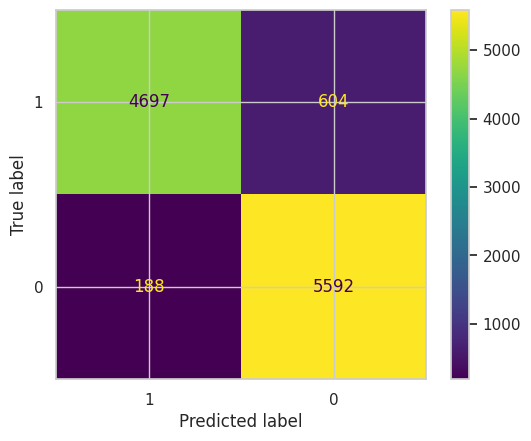

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

result=confusion_matrix(y_test,y_pred1)
labels=[1,0]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=42)
xgb.fit(X_train, y_train)
y_pred2=xgb.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

0.8371988087717716
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      5301
           1       0.77      0.97      0.86      5780

    accuracy                           0.84     11081
   macro avg       0.87      0.83      0.83     11081
weighted avg       0.86      0.84      0.83     11081



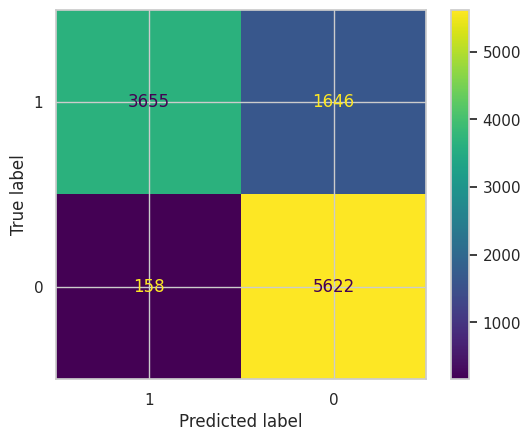

In [ ]:
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

result=confusion_matrix(y_test,y_pred2)
labels=[1,0]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
import os
import pickle

# directory path
directory_path = '/content/drive/MyDrive/NLP_ML_Datasets/'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Save the pickled files
with open(os.path.join(directory_path, 'vectorizer1.pkl'), 'wb') as vec_file:
    pickle.dump(vec, vec_file)

with open(os.path.join(directory_path, 'model1.pkl'), 'wb') as model_file:
    pickle.dump(xgb, model_file)
